## About this notebook

In this notebook , I will start with complete explanation of everything you need know related to Prostate Cancer and its detection and I will built on that to explain the dataset and perform extensive EDA.

**This kernel will be a work in Progress,and I will keep on updating it as the competition progresses**

**<span style="color:Red">If you find this kernel useful, Please consider Upvoting it, it motivates me to write more Quality content**



# 1. Dive deep into domain knowledge

So lets start with the domain knowledge and Address the first question

### Q1) What is Prostate Cancer?
Prostate cancer is cancer that occurs in the prostate ,a small walnut-shaped gland in men that produces the seminal fluid that nourishes and transports sperm.

Prostate cancer is one of the most common types of cancer in men. Usually prostate cancer grows slowly and is initially confined to the prostate gland, where it may not cause serious harm. However, while some types of prostate cancer grow slowly and may need minimal or even no treatment, other types are aggressive and can spread quickly.


### Q2) How it is tested and detected?
Prostate screening tests might include:

* Digital rectal exam (DRE): During a DRE, your doctor inserts a gloved, lubricated finger into your rectum to examine your prostate, which is adjacent to the rectum. If your doctor finds any abnormalities in the texture, shape or size of the gland, you may need further tests.
* Prostate-specific antigen (PSA) test: A blood sample is drawn from a vein in your arm and analyzed for PSA, a substance that's naturally produced by your prostate gland. It's normal for a small amount of PSA to be in your bloodstream. However, if a higher than normal level is found, it may indicate prostate infection, inflammation, enlargement or cancer.

If a DRE or PSA test detects an abnormality, your doctor may recommend further tests to determine whether you have prostate cancer, such as:

* Ultrasound : If other tests raise concerns, your doctor may use transrectal ultrasound to further evaluate your prostate. A small probe, about the size and shape of a cigar, is inserted into your rectum. The probe uses sound waves to create a picture of your prostate gland.
* Collecting a sample of prostate tissue : If initial test results suggest prostate cancer, your doctor may recommend a procedure to collect a sample of cells from your prostate (prostate biopsy). Prostate biopsy is often done using a thin needle that's inserted into the prostate to collect tissue. The tissue sample is analyzed in a lab to determine whether cancer cells are present.

### Q3) Where does GLEASON score fit-in all of this?
When a biopsy confirms the presence of cancer, the next step is to determine the level of aggressiveness (grade) of the cancer cells. A laboratory pathologist examines a sample of your cancer to determine how much cancer cells differ from the healthy cells. A higher grade indicates a more aggressive cancer that is more likely to spread quickly.

The most common scale used to evaluate the grade of prostate cancer cells is called a Gleason score. Gleason scoring combines two numbers and can range from 2 (nonaggressive cancer) to 10 (very aggressive cancer), though the lower part of the range isn't used as often.

### Q4)I got it but What is ISUP grade now?
According to current guidelines by the International Society of Urological Pathology (ISUP), the Gleason scores are summarized into an ISUP grade on a scale from 1 to 5 according to the following rule:

* Gleason score 6 = ISUP grade 1

* Gleason score 7 (3 + 4) = ISUP grade 2

* Gleason score 7 (4 + 3) = ISUP grade 3

* Gleason score 8 = ISUP grade 4

* Gleason score 9-10 = ISUP grade 5


If there is no cancer in the sample, we use the label ISUP grade 0 in this competition.


### Q5) How has the Gleason scores been generated in the dataset?
Each WSI in this challenge contains one, or in some cases two, thin tissue sections cut from a single biopsy sample. Prior to scanning, the tissue is stained with haematoxylin & eosin (H&E). This is a standard way of staining the originally transparent tissue to produce some contrast. The samples are made up of glandular tissue and connective tissue. The glands are hollow structures, which can be seen as white “holes” or branched cavities in the WSI. The appearance of the glands forms the basis of the Gleason grading system. The glandular structure characteristic of healthy prostate tissue is progressively lost with increasing grade. The grading system recognizes three categories: 3, 4, and 5.

* [A]Benign prostate glands with folded epithelium :The cytoplasm is pale and the nuclei small and regular. The glands are grouped together.
* [B]Prostatic adenocarcinoma : Gleason Pattern 3 has no loss of glandular differentiation. Small glands infiltrate between benign glands. The cytoplasm is often dark and the nuclei enlarged with dark chromatin and some prominent nucleoli. Each epithelial unit is separate and has a lumen.
* [C]Prostatic adenocarcinoma : Gleason Pattern 4 has partial loss of glandular differentiation. There is an attempt to form lumina but the tumor fails to form complete, well-developed glands. This microphotograph shows irregular cribriform cancer, i.e. epithelial sheets with multiple lumina. There are also some poorly formed small glands and some fused glands. All of these are included in Gleason Pattern 4.
* [D]Prostatic adenocarcinoma : Gleason Pattern 5 has an almost complete loss of glandular differentiation. Dispersed single cancer cells are seen in the stroma. Gleason Pattern 5 may also contain solid sheets or strands of cancer cells. All microphotographs show hematoxylin and eosin stains at 20x lens magnification.

<img src="https://storage.googleapis.com/kaggle-media/competitions/PANDA/GleasonPattern_4squares%20copy500.png" height="100px">


# 2. Getting started with the PANDA dataset

This shows a few methods to load and display images from the PANDA challenge dataset. The dataset consists of around 11.000 whole-slide images (WSI) of prostate biopsies from Radboud University Medical Center and the Karolinska Institute.


In [ ]:
import os

# There are two ways to load the data from the PANDA dataset:
# Option 1: Load images using openslide
import openslide
# Option 2: Load images using skimage (requires that tifffile is installed)
import skimage.io
import random
import seaborn as sns
import cv2

# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PIL
from IPython.display import Image, display

# Plotly for the interactive viewer (see last section)
import plotly.graph_objs as go


## 3. Loading Dataset

In [ ]:
# Location of the training images

BASE_PATH = '../input/prostate-cancer-grade-assessment'

# image and mask directories
data_dir = f'{BASE_PATH}/train_images'
mask_dir = f'{BASE_PATH}/train_label_masks'


# Location of training labels
train = pd.read_csv(f'{BASE_PATH}/train.csv').set_index('image_id')
test = pd.read_csv(f'{BASE_PATH}/test.csv')
submission = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')

In [ ]:
display(train.head())
print("Shape of training data :", train.shape)
print("unique data provider :", len(train.data_provider.unique()))
print("unique isup_grade(target) :", len(train.isup_grade.unique()))
print("unique gleason_score :", len(train.gleason_score.unique()))

data_provider  isup_grade gleason_score
image_id                                                                
0005f7aaab2800f6170c399693a96917    karolinska           0           0+0
000920ad0b612851f8e01bcc880d9b3d    karolinska           0           0+0
0018ae58b01bdadc8e347995b69f99aa       radboud           4           4+4
001c62abd11fa4b57bf7a6c603a11bb9    karolinska           4           4+4
001d865e65ef5d2579c190a0e0350d8f    karolinska           0           0+0

Shape of training data : (10616, 3)
unique data provider : 2
unique isup_grade(target) : 6
unique gleason_score : 11


In [ ]:
train.isna().sum()

data_provider    0
isup_grade       0
gleason_score    0
dtype: int64

In [ ]:
display(test.head())
print("Shape of training data :", test.shape)
print("unique data provider :", len(test.data_provider.unique()))

image_id data_provider
0  005700be7e06878e6605e7a5a39de1b2       radboud
1  005c6e8877caf724c600fdce5d417d40    karolinska
2  0104f76634ff89bfff1ef0804a95c380       radboud

Shape of training data : (3, 2)
unique data provider : 2


### Output Variables

* `isup_grade`: The target variable. The severity of the cancer on a 0-5 scale.
* `gleason_score`: Train only. An alternate cancer severity rating system with more levels than the ISUP scale. For details on how the gleason and ISUP systems compare, see the Additional Resources tab.

![](https://storage.googleapis.com/kaggle-media/competitions/PANDA/Screen%20Shot%202020-04-08%20at%202.03.53%20PM.png)

### Note: There are no test images publically available.

## 4. Basic EDA

### 4.1 Checking for `data provider` distribution

In [ ]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.show()

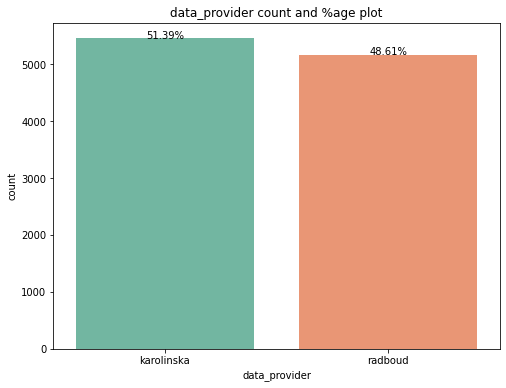

In [ ]:
plot_count(df=train, feature='data_provider', title = 'data_provider count and %age plot')

### 4.2 Checking for `isup_grade` distribution


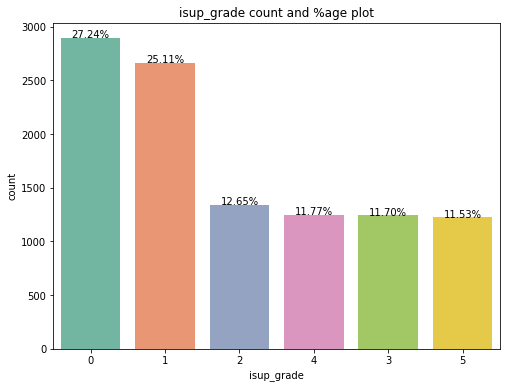

In [ ]:
plot_count(df=train, feature='isup_grade', title = 'isup_grade count and %age plot')


**inference:**

* Majority of data samples in train set have ISUP grade values 0 or 1 (total > 50%).
* Rest of the data samples have associated ISUP grades from 2 to 5 with all ranging in the 11-12% each.
* Dataset is not balanced in terms of isup_grade.

### 4.3 Checking for `gleason_score` distribution


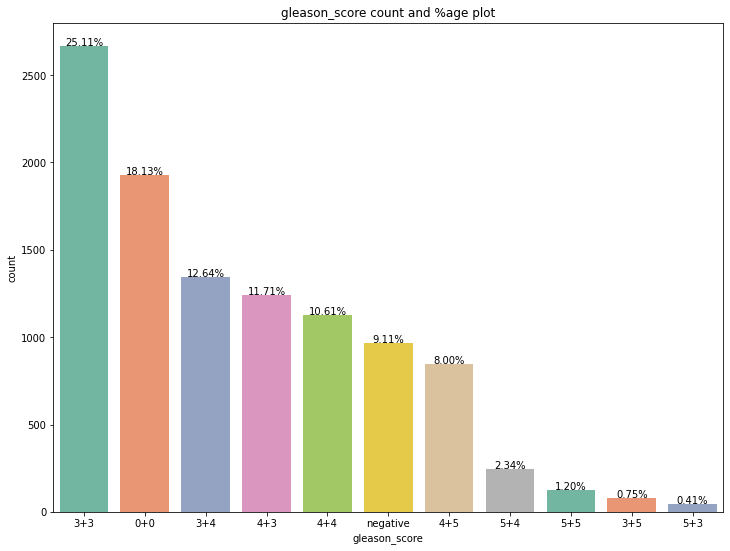

In [ ]:
plot_count(df=train, feature='gleason_score', title = 'gleason_score count and %age plot', size=3)


**inference:**

* From above graph, it is clear that gleason_score distribution is not uniform.
* Few gleason_score like (3+3) and (0+0) are more frequent while others like (3+5) and (5+3) are very rare in this dataset.
* Dataset is not balanced in terms of gleason_score.

### 4.4 Let's check for relative distribution of `isup_grade` and `data_provider`

In [ ]:
def plot_relative_distribution(df, feature, hue, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(x=feature, hue=hue, data=df, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.show()

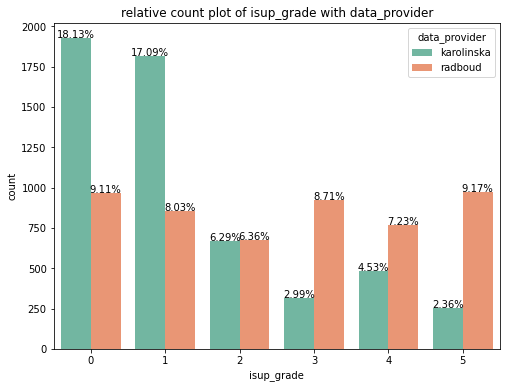

In [ ]:
plot_relative_distribution(df=train, feature='isup_grade', hue='data_provider', title = 'relative count plot of isup_grade with data_provider', size=2)

**inference:**

* In isup_grade category 0 and 1 most of the data is provided by `karolinska`.
* In isup_grade category 3,4 and 5 most of the data is provided by `radbound`.

### 4.5 Let's check for relative distribution of `gleason_score` and `data_provider`

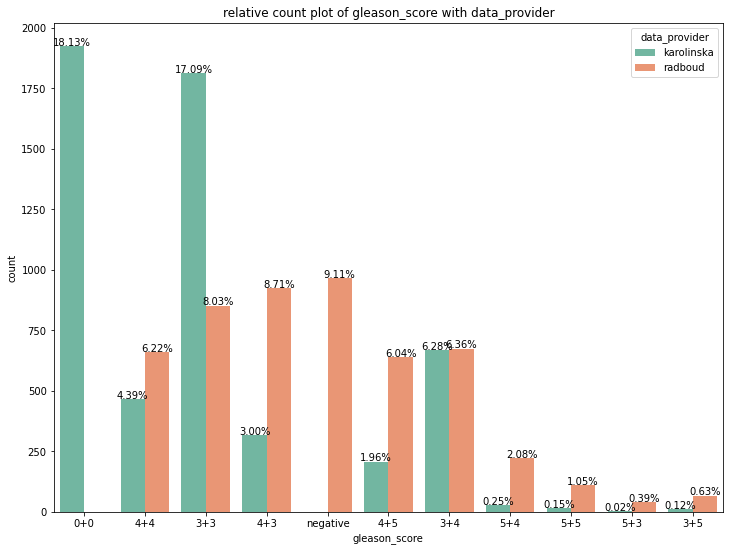

In [ ]:
plot_relative_distribution(df=train, feature='gleason_score', hue='data_provider', title = 'relative count plot of gleason_score with data_provider', size=3)

**inference:**

* In gleason_score category (0+0), all the data is provided by `karolinska`.
* In gleason_score category (negative), all the data is provided by `radbound`.
* Also in gleason_score category (3+3), karolinska is major data provider.
* On the other hand radbound is major data provider for (4+4), (4+3), (4+5), (5+4), (5+5), (5+3), (3+5).

### 4.6 Let's check for relative distribution of `isup_grade` and `gleason_score`

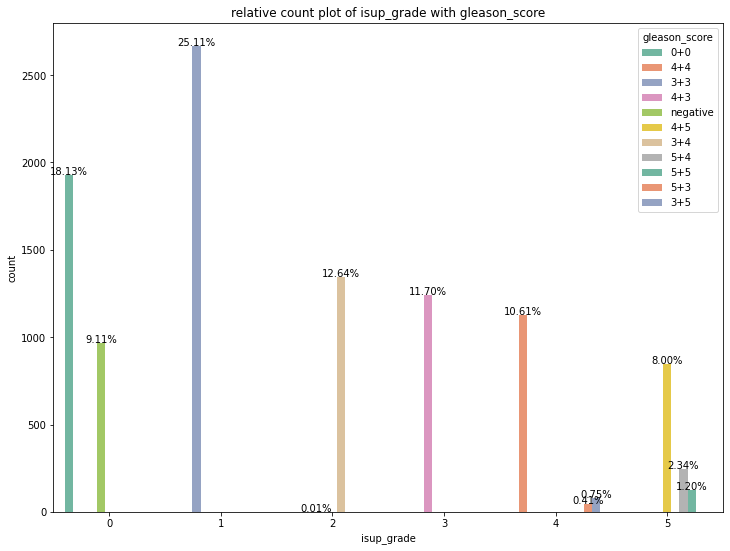

In [ ]:
plot_relative_distribution(df=train, feature='isup_grade', hue='gleason_score', title = 'relative count plot of isup_grade with gleason_score', size=3)

**inference:**

* All exams with ISUP grade = 0 have Gleason score 0+0 or negative.
* All exams with ISUP grade = 1 have Gleason score 3+3.
* All exams with ISUP grade = 2 have Gleason score 3+4.
* All exams with ISUP grade = 3 have Gleason score 4+3.
* All exams with ISUP grade = 4 have Gleason score 4+4 (majority), 3+5 or 5+3.
* All exams with ISUP grade = 5 have Gleason score 4+5 (majority), 5+4 or 5+5.

## 5. Quickly displaying few images

In the following sections we will load data from the slides with [OpenSlide](https://openslide.org/api/python/). The benefit of OpenSlide is that we can load arbitrary regions of the slide, without loading the whole image in memory. Want to interactively view a slide? We have added an [interactive viewer](#Interactive-viewer-for-slides) to this notebook in the last section.

You can read more about the OpenSlide python bindings in the documentation: https://openslide.org/api/python/


In [ ]:
def display_images(slides):
    f, ax = plt.subplots(5,3, figsize=(18,22))
    for i, slide in enumerate(slides):
        image = openslide.OpenSlide(os.path.join(data_dir, f'{slide}.tiff'))
        spacing = 1 / (float(image.properties['tiff.XResolution']) / 10000)
        patch = image.read_region((1780,1950), 0, (256, 256))
        ax[i//3, i%3].imshow(patch)
        image.close()
        ax[i//3, i%3].axis('off')

        image_id = slide
        data_provider = train.loc[slide, 'data_provider']
        isup_grade = train.loc[slide, 'isup_grade']
        gleason_score = train.loc[slide, 'gleason_score']
        ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")

    plt.show()


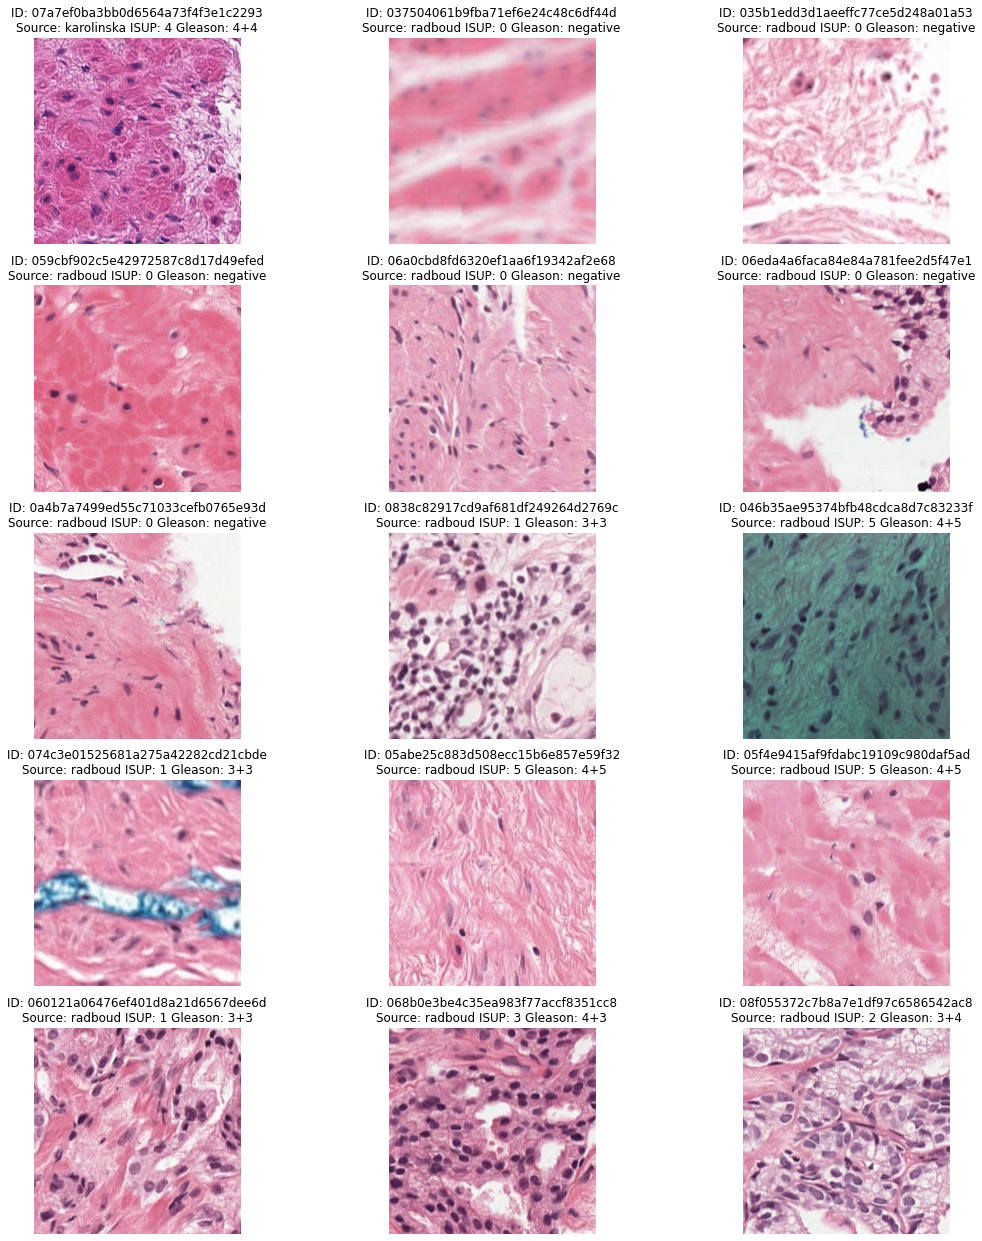

In [ ]:
images = [
    '07a7ef0ba3bb0d6564a73f4f3e1c2293',
    '037504061b9fba71ef6e24c48c6df44d',
    '035b1edd3d1aeeffc77ce5d248a01a53',
    '059cbf902c5e42972587c8d17d49efed',
    '06a0cbd8fd6320ef1aa6f19342af2e68',
    '06eda4a6faca84e84a781fee2d5f47e1',
    '0a4b7a7499ed55c71033cefb0765e93d',
    '0838c82917cd9af681df249264d2769c',
    '046b35ae95374bfb48cdca8d7c83233f',
    '074c3e01525681a275a42282cd21cbde',
    '05abe25c883d508ecc15b6e857e59f32',
    '05f4e9415af9fdabc19109c980daf5ad',
    '060121a06476ef401d8a21d6567dee6d',
    '068b0e3be4c35ea983f77accf8351cc8',
    '08f055372c7b8a7e1df97c6586542ac8'
]

display_images(images)

> Few Insights:
   - The image dimensions are quite large (typically between 5.000 and 40.000 pixels in both x and y).
   - Each slide has 3 levels you can load, corresponding to a downsampling of 1, 4 and 16. Intermediate levels can be created by downsampling a higher resolution level.
   - The dimensions of each level differ based on the dimensions of the original image.
   - Biopsies can be in different rotations. This rotation has no clinical value, and is only dependent on how the biopsy was collected in the lab.
   - There are noticable color differences between the biopsies, this is very common within pathology and is caused by different laboratory procedures.


## 6. Loading label masks

Apart from the slide-level label (present in the csv file), almost all slides in the training set have an associated mask with additional label information. These masks directly indicate which parts of the tissue are healthy and which are cancerous. The information in the masks differ from the two centers:

- **Radboudumc**: Prostate glands are individually labelled. Valid values are:
  - 0: background (non tissue) or unknown
  - 1: stroma (connective tissue, non-epithelium tissue)
  - 2: healthy (benign) epithelium"
  - 3: cancerous epithelium (Gleason 3)
  - 4: cancerous epithelium (Gleason 4)
  - 5: cancerous epithelium (Gleason 5)
- **Karolinska**: Regions are labelled. Valid values:
  - 0: background (non tissue) or unknown
  - 1: benign tissue (stroma and epithelium combined)
  - 2: cancerous tissue (stroma and epithelium combined)

The label masks of Radboudumc were semi-automatically generated by several deep learning algorithms, contain noise, and can be considered as weakly-supervised labels. The label masks of Karolinska were semi-autotomatically generated based on annotations by a pathologist.

The label masks are stored in an RGB format so that they can be easily opened by image readers. The label information is stored in the red (R) channel, the other channels are set to zero and can be ignored. As with the slides itself, the label masks can be opened using OpenSlide.

### Visualizing masks (using matplotlib)

Given that the masks are just integer matrices, you can also use other packages to display the masks. For example, using matplotlib and a custom color map we can quickly visualize the different cancer regions:

In [ ]:
def display_masks(slides):
    f, ax = plt.subplots(5,3, figsize=(18,22))
    for i, slide in enumerate(slides):

        mask = openslide.OpenSlide(os.path.join(mask_dir, f'{slide}_mask.tiff'))
        mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
        cmap = matplotlib.colors.ListedColormap(['black', 'gray', 'green', 'yellow', 'orange', 'red'])

        ax[i//3, i%3].imshow(np.asarray(mask_data)[:,:,0], cmap=cmap, interpolation='nearest', vmin=0, vmax=5)
        mask.close()
        ax[i//3, i%3].axis('off')

        image_id = slide
        data_provider = train.loc[slide, 'data_provider']
        isup_grade = train.loc[slide, 'isup_grade']
        gleason_score = train.loc[slide, 'gleason_score']
        ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")
        f.tight_layout()

    plt.show()

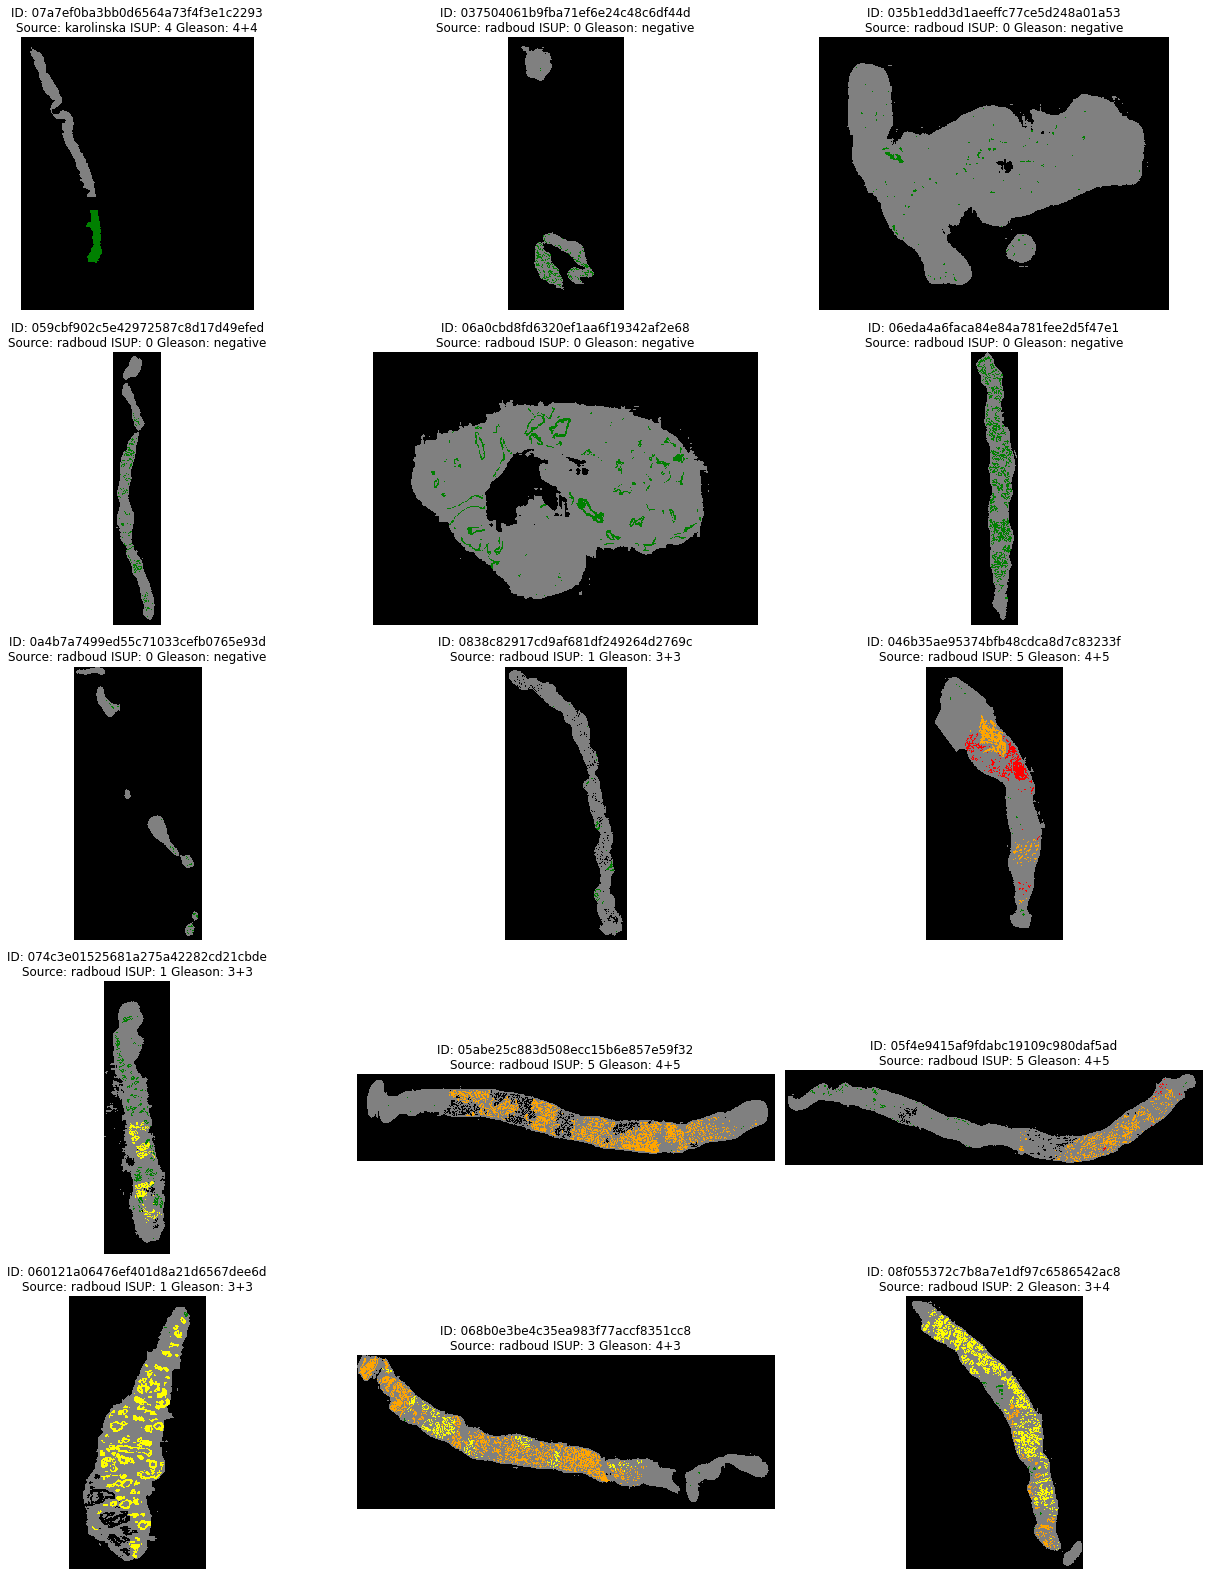

In [ ]:
display_masks(images)

### Displaying images and masks for each isup_grade category

Check for images without masks, as from [this](https://www.kaggle.com/c/prostate-cancer-grade-assessment/discussion/145574) discussion thread it is clear that there are 100 images which do not have any mask in the mask directory.


In [ ]:
data_providers = ['karolinska', 'radboud']
train_df = pd.read_csv(f'{BASE_PATH}/train.csv')
masks = os.listdir(mask_dir)
masks_df = pd.Series(masks).to_frame()
masks_df.columns = ['mask_file_name']
masks_df['image_id'] = masks_df.mask_file_name.apply(lambda x: x.split('_')[0])
train_df = pd.merge(train_df, masks_df, on='image_id', how='outer')
del masks_df
print(f"There are {len(train_df[train_df.mask_file_name.isna()])} images without a mask.")

## removing items where image mask is null
train_df = train_df[~train_df.mask_file_name.isna()]

There are 100 images without a mask.


In [ ]:
def load_and_resize_image(img_id):
    """
    Edited from https://www.kaggle.com/xhlulu/panda-resize-and-save-train-data
    """
    biopsy = skimage.io.MultiImage(os.path.join(data_dir, f'{img_id}.tiff'))
    return cv2.resize(biopsy[-1], (512, 512))

def load_and_resize_mask(img_id):
    """
    Edited from https://www.kaggle.com/xhlulu/panda-resize-and-save-train-data
    """
    biopsy = skimage.io.MultiImage(os.path.join(mask_dir, f'{img_id}_mask.tiff'))
    return cv2.resize(biopsy[-1], (512, 512))[:,:,0]

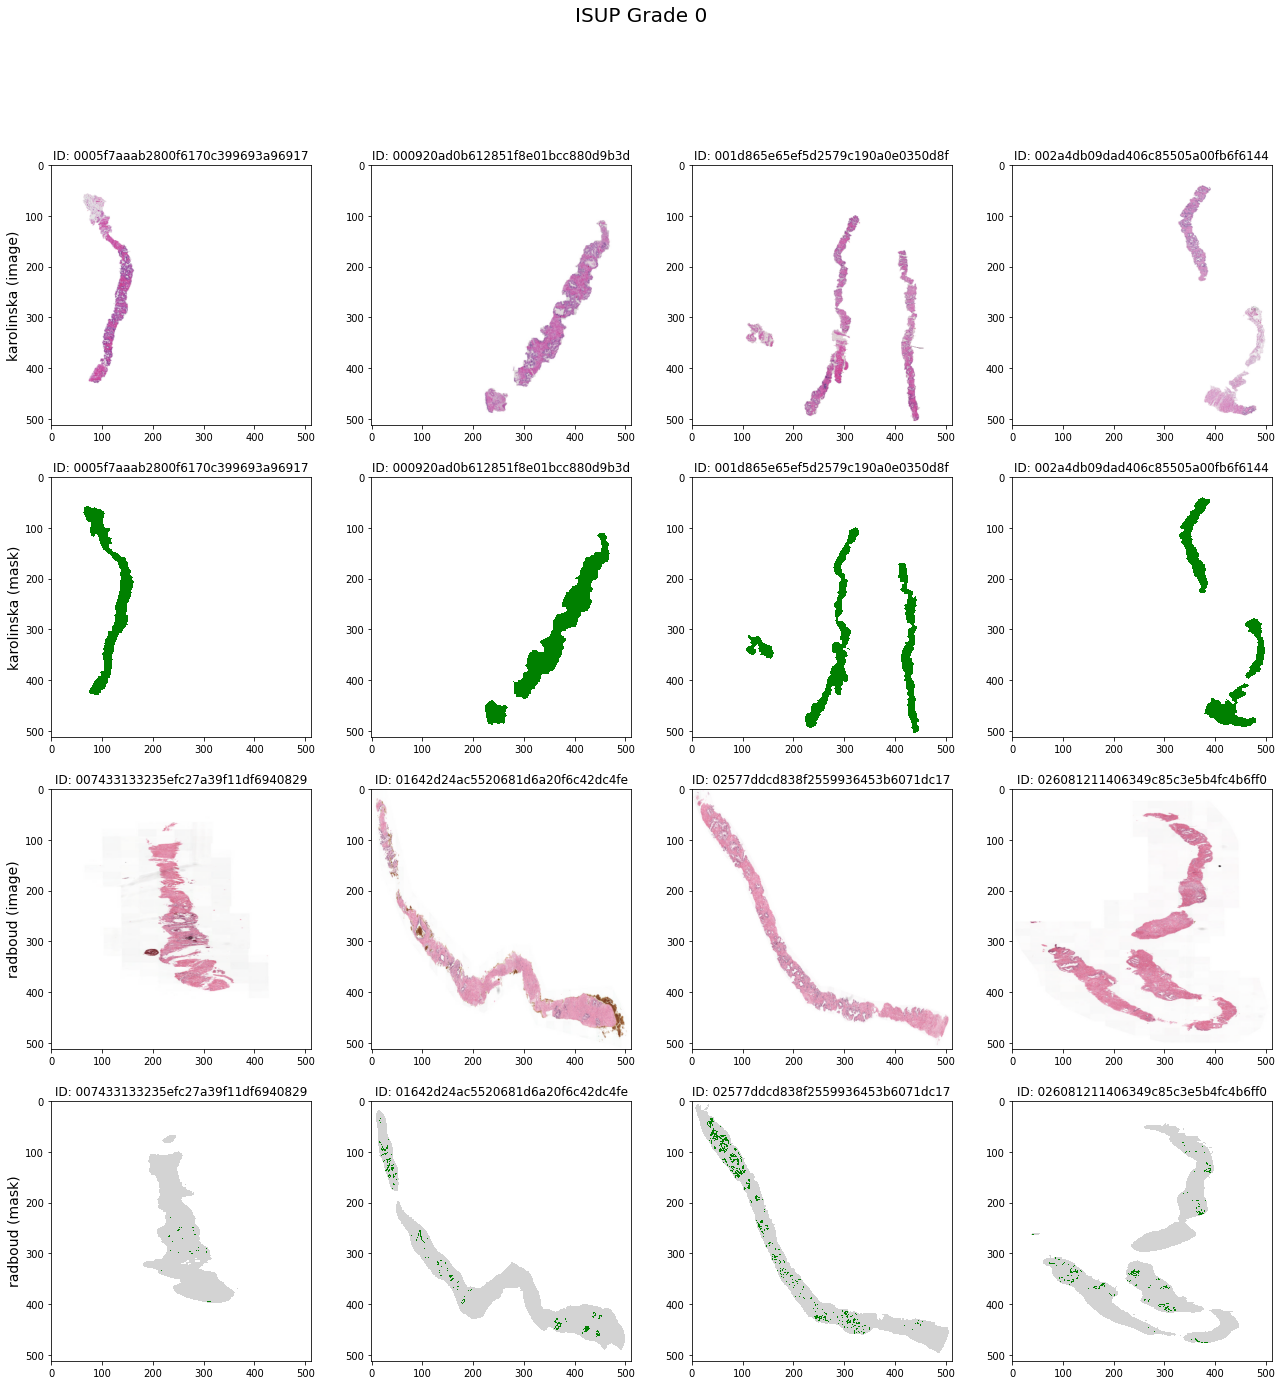

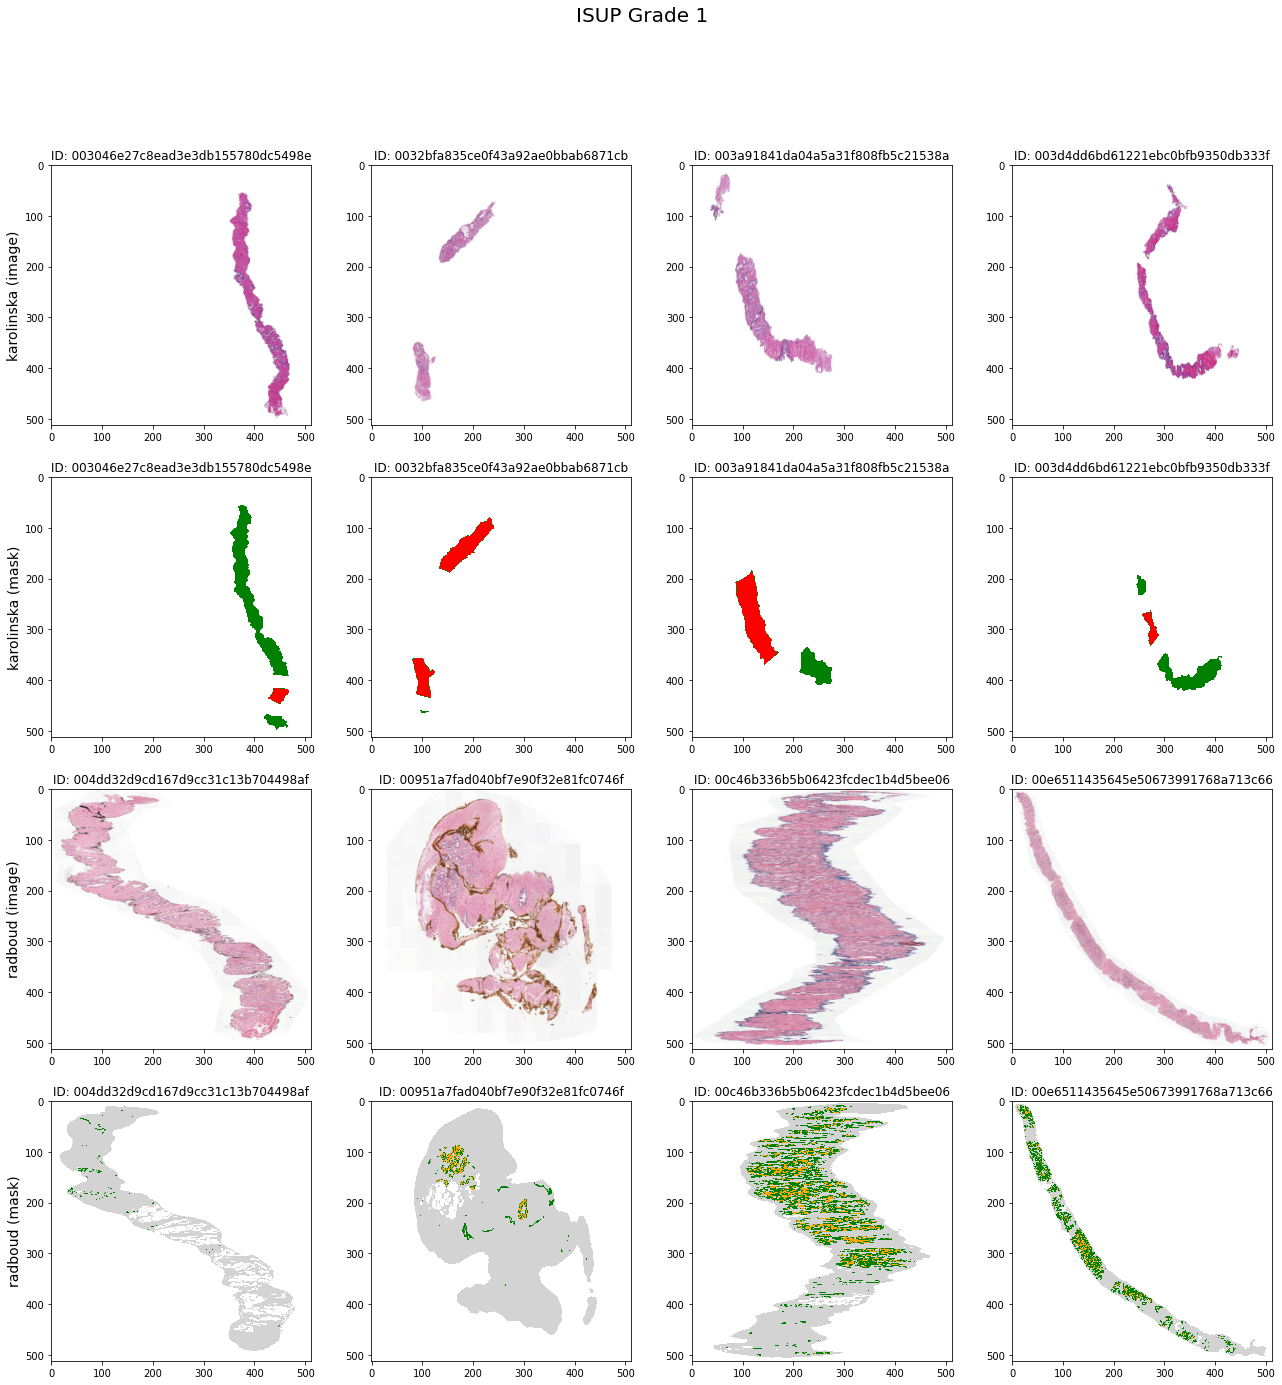

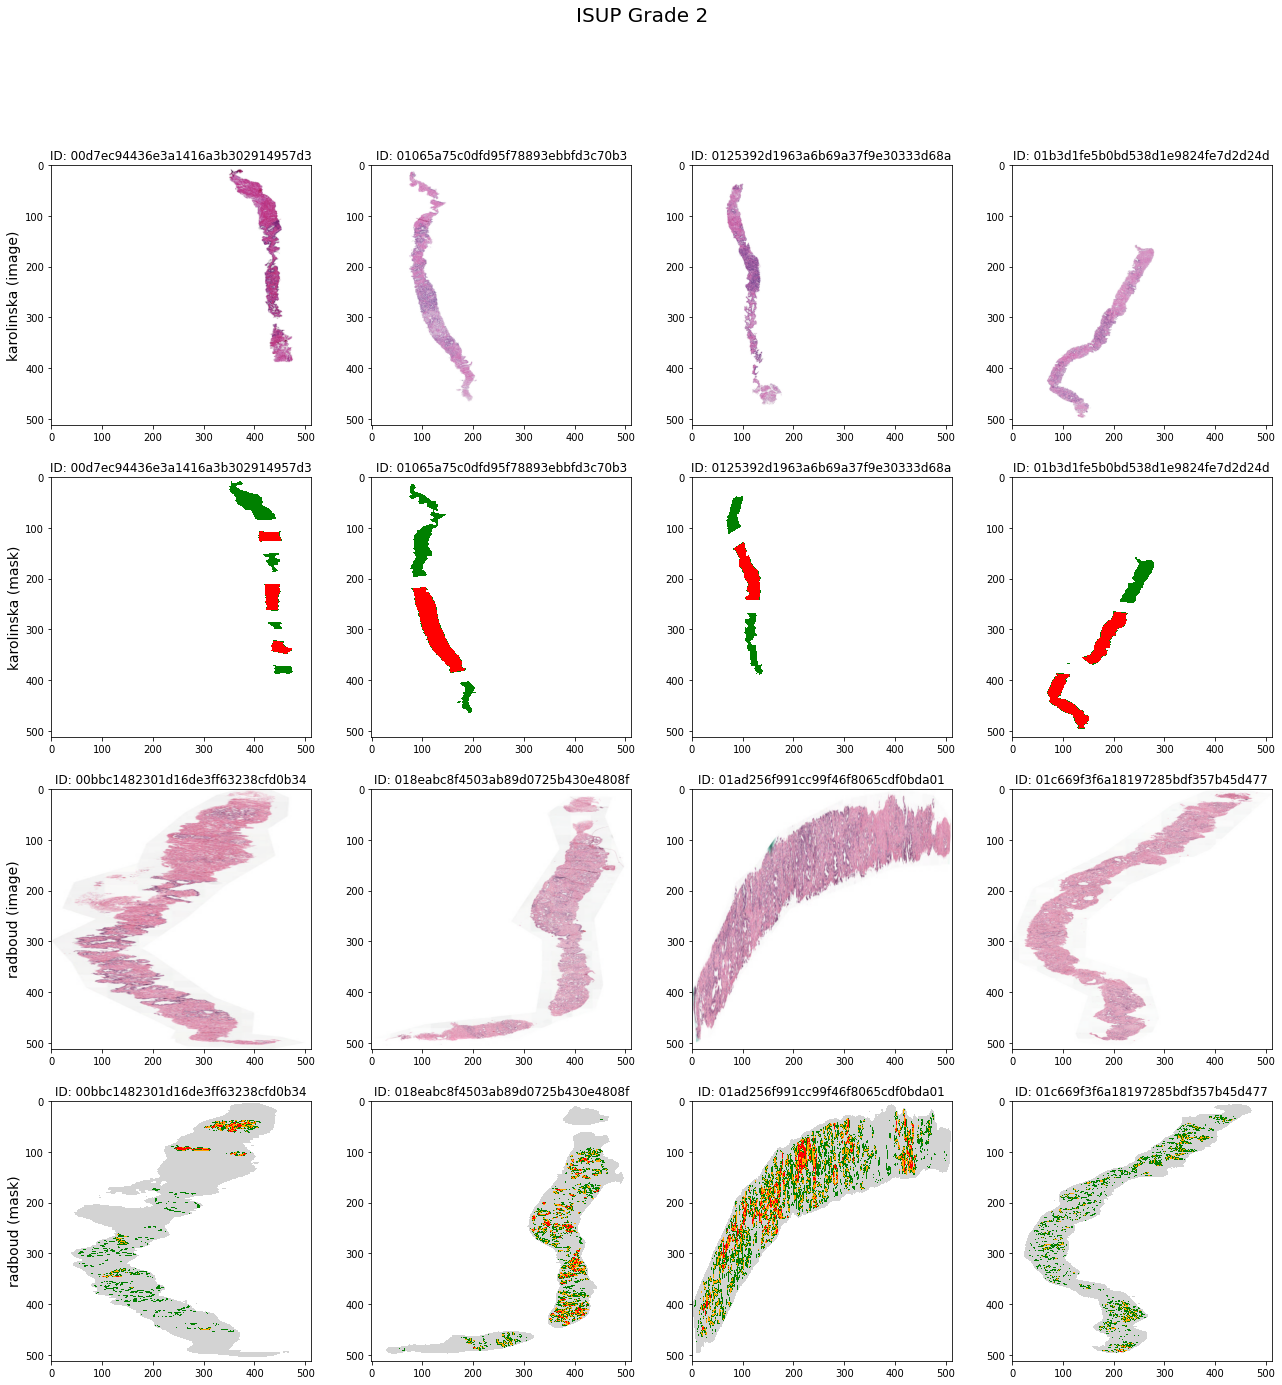

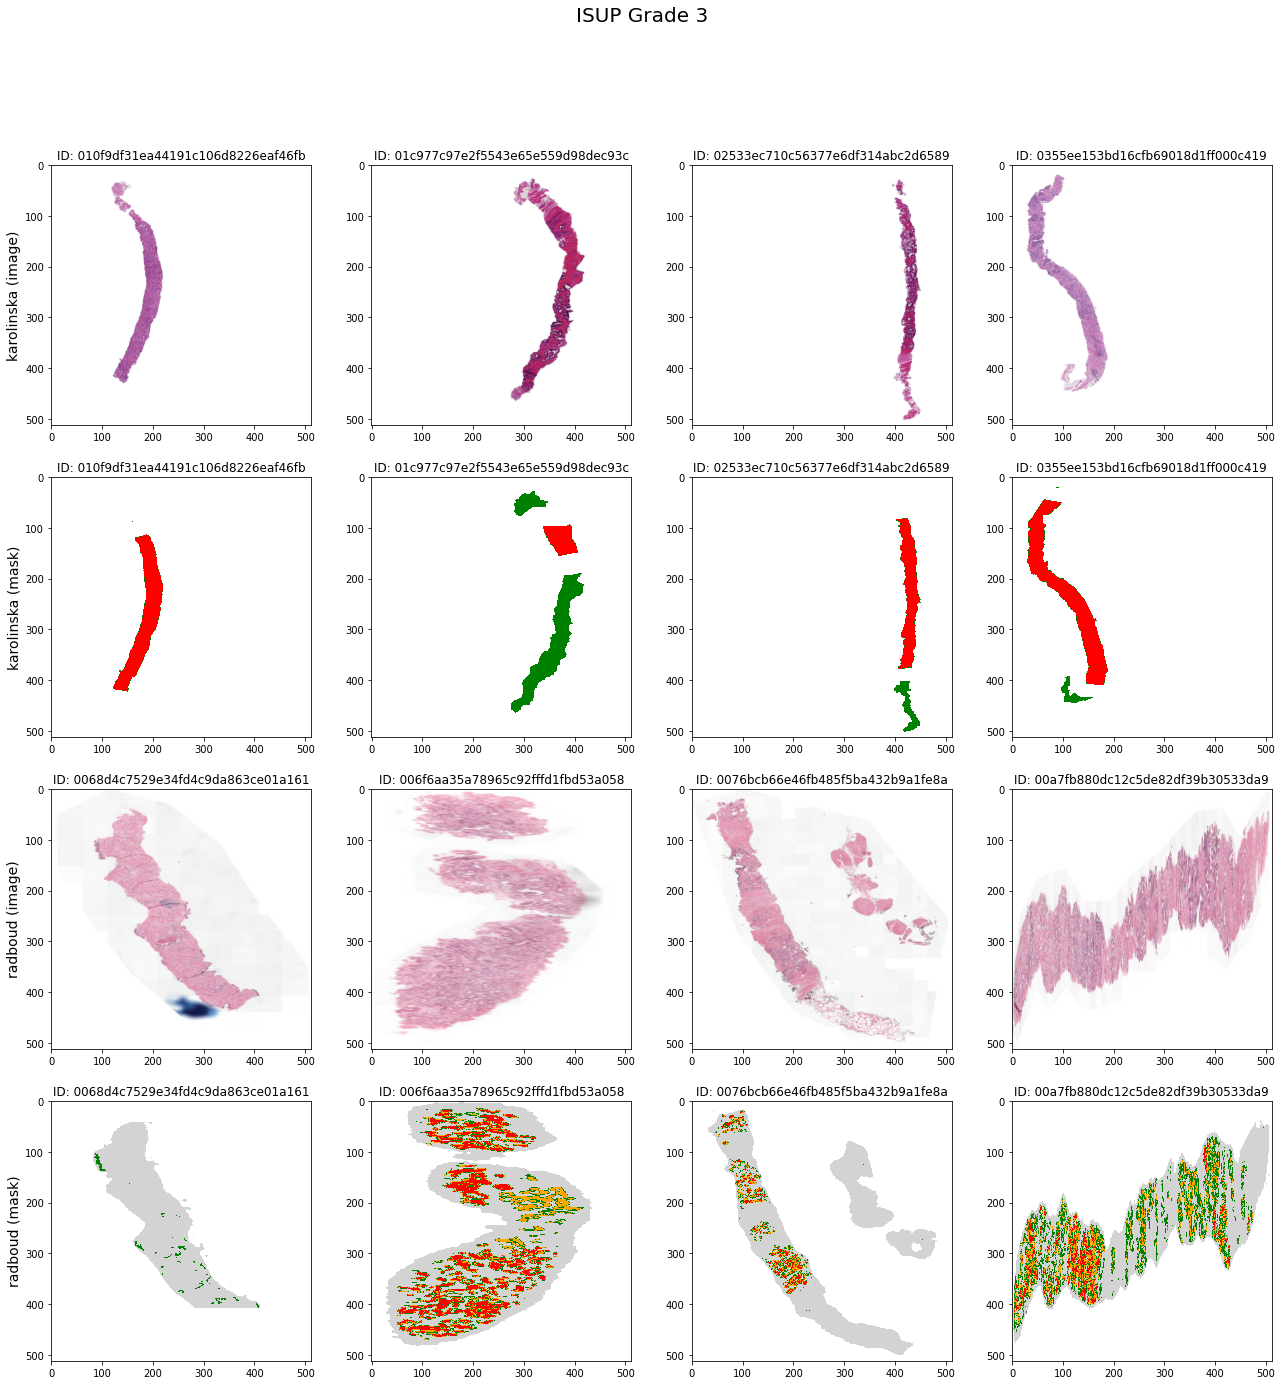

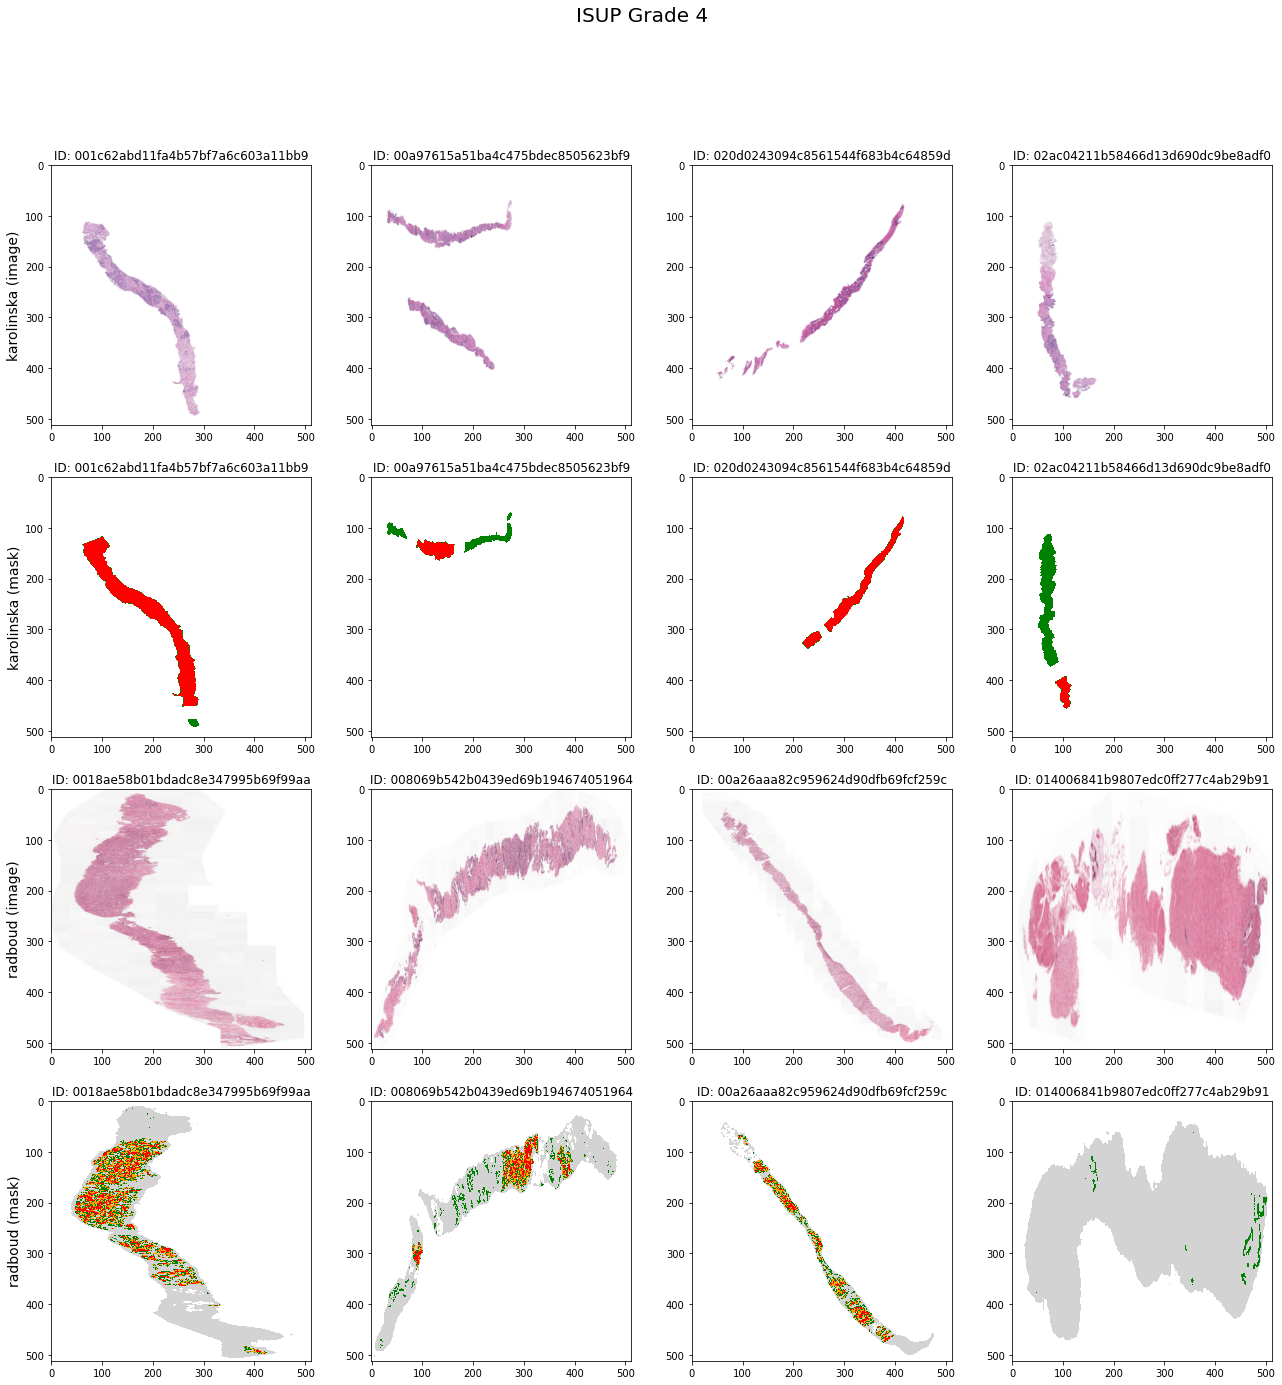

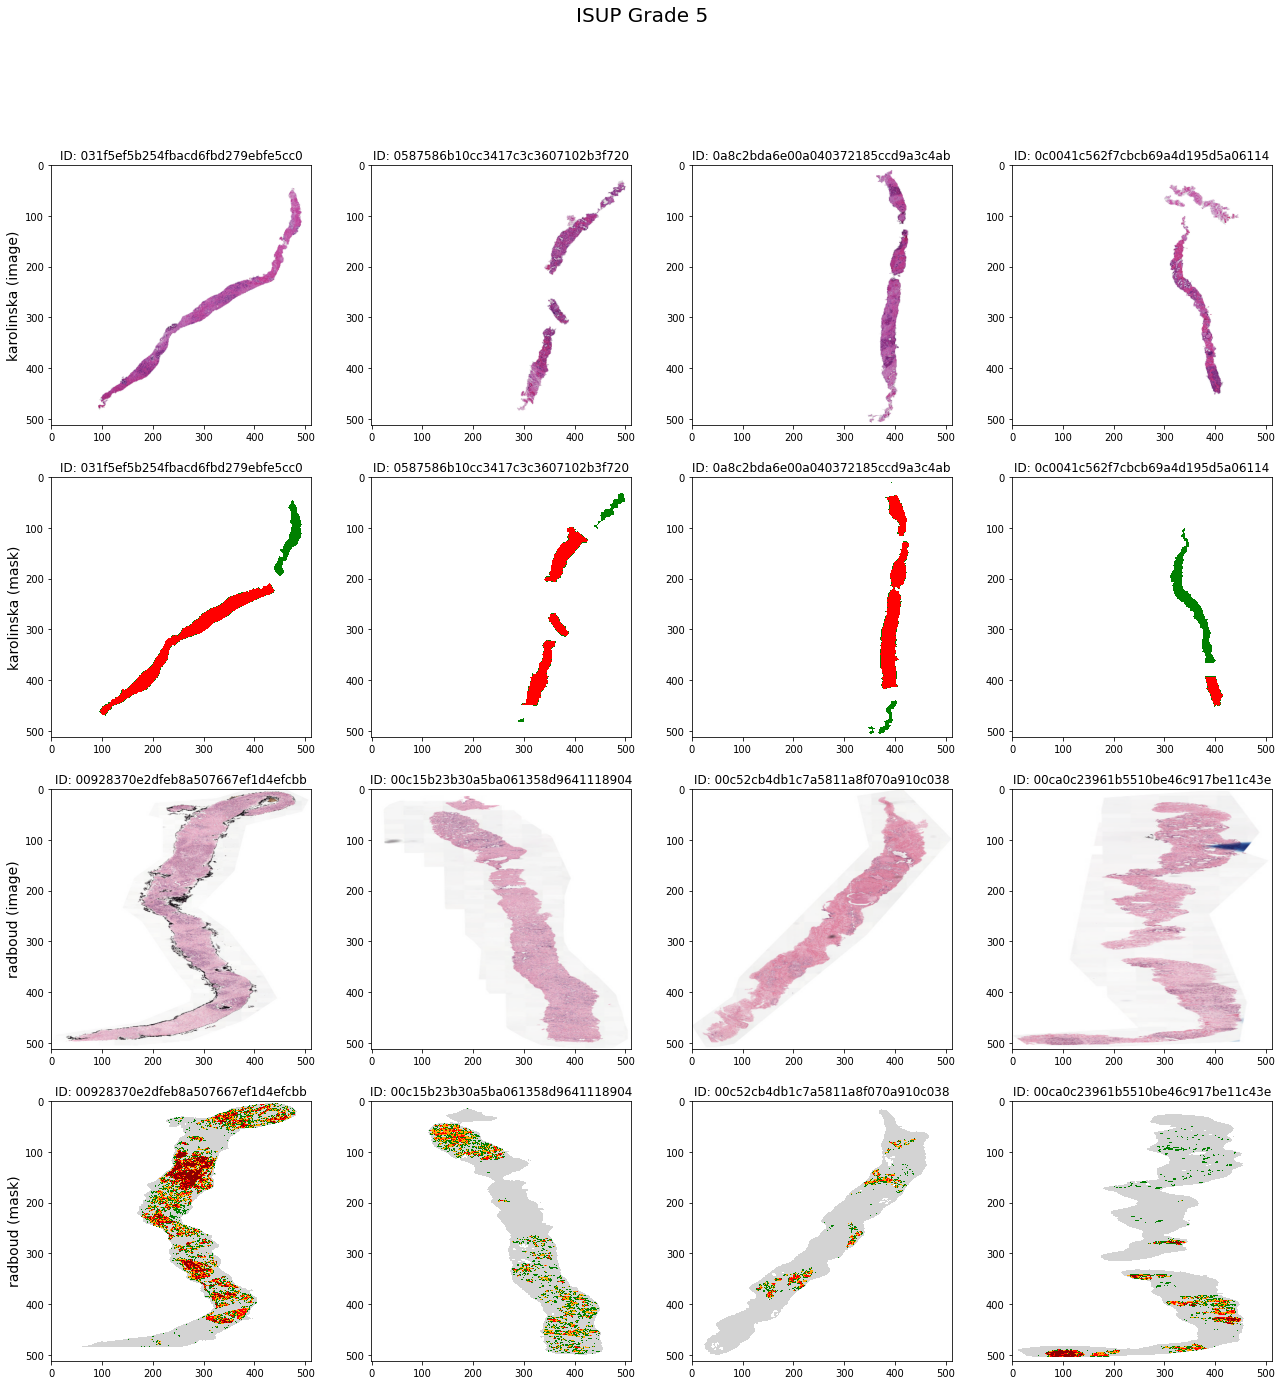

In [ ]:

labels = []
for grade in range(train.isup_grade.nunique()):
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(22, 22))

    for i, row in enumerate(ax):
        idx = i//2
        temp = train_df[(train_df.isup_grade == grade) & (train_df.data_provider == data_providers[idx])].image_id.head(4).reset_index(drop=True)
        if i%2 < 1:
            labels.append(f'{data_providers[idx]} (image)')
            for j, col in enumerate(row):
                col.imshow(load_and_resize_image(temp[j]))
                col.set_title(f"ID: {temp[j]}")

        else:
            labels.append(f'{data_providers[idx]} (mask)')
            for j, col in enumerate(row):
                if data_providers[idx] == 'radboud':
                    col.imshow(load_and_resize_mask(temp[j]),
                               cmap = matplotlib.colors.ListedColormap(['white', 'lightgrey', 'green', 'orange', 'red', 'darkred']),
                               norm = matplotlib.colors.Normalize(vmin=0, vmax=5, clip=True))
                else:
                    col.imshow(load_and_resize_mask(temp[j]),
                           cmap = matplotlib.colors.ListedColormap(['white', 'green', 'red']),
                           norm = matplotlib.colors.Normalize(vmin=0, vmax=2, clip=True))

                gleason_score = train.loc[temp[j], 'gleason_score']
                col.set_title(f"ID: {temp[j]}")

    for row, r in zip(ax[:,0], labels):
        row.set_ylabel(r, rotation=90, size='large', fontsize=14)

    plt.suptitle(f'ISUP Grade {grade}', fontsize=20)
    plt.show()

## Overlaying masks on the slides

As the masks have the same dimension as the slides, we can overlay the masks on the tissue to directly see which areas are cancerous. This overlay can help you identifying the different growth patterns. To do this, we load both the mask and the biopsy and merge them using PIL.

**Tip:** Want to view the slides in a more interactive way? Using a WSI viewer you can interactively view the slides. Examples of open source viewers that can open the PANDA dataset are [ASAP](https://github.com/computationalpathologygroup/ASAP) and [QuPath](https://qupath.github.io/). ASAP can also overlay the masks on top of the images using the "Overlay" functionality. If you use Qupath, and the images do not load, try changing the file extension to `.vtif`.

In [ ]:
def overlay_mask_on_slide(images, center='radboud', alpha=0.8, max_size=(800, 800)):
    """Show a mask overlayed on a slide."""
    f, ax = plt.subplots(5,3, figsize=(18,22))


    for i, image_id in enumerate(images):
        slide = openslide.OpenSlide(os.path.join(data_dir, f'{image_id}.tiff'))
        mask = openslide.OpenSlide(os.path.join(mask_dir, f'{image_id}_mask.tiff'))
        slide_data = slide.read_region((0,0), slide.level_count - 1, slide.level_dimensions[-1])
        mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
        mask_data = mask_data.split()[0]


        # Create alpha mask
        alpha_int = int(round(255*alpha))
        if center == 'radboud':
            alpha_content = np.less(mask_data.split()[0], 2).astype('uint8') * alpha_int + (255 - alpha_int)
        elif center == 'karolinska':
            alpha_content = np.less(mask_data.split()[0], 1).astype('uint8') * alpha_int + (255 - alpha_int)

        alpha_content = PIL.Image.fromarray(alpha_content)
        preview_palette = np.zeros(shape=768, dtype=int)

        if center == 'radboud':
            # Mapping: {0: background, 1: stroma, 2: benign epithelium, 3: Gleason 3, 4: Gleason 4, 5: Gleason 5}
            preview_palette[0:18] = (np.array([0, 0, 0, 0.5, 0.5, 0.5, 0, 1, 0, 1, 1, 0.7, 1, 0.5, 0, 1, 0, 0]) * 255).astype(int)
        elif center == 'karolinska':
            # Mapping: {0: background, 1: benign, 2: cancer}
            preview_palette[0:9] = (np.array([0, 0, 0, 0, 1, 0, 1, 0, 0]) * 255).astype(int)

        mask_data.putpalette(data=preview_palette.tolist())
        mask_rgb = mask_data.convert(mode='RGB')
        overlayed_image = PIL.Image.composite(image1=slide_data, image2=mask_rgb, mask=alpha_content)
        overlayed_image.thumbnail(size=max_size, resample=0)


        ax[i//3, i%3].imshow(overlayed_image)
        slide.close()
        mask.close()
        ax[i//3, i%3].axis('off')

        data_provider = train.loc[image_id, 'data_provider']
        isup_grade = train.loc[image_id, 'isup_grade']
        gleason_score = train.loc[image_id, 'gleason_score']
        ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")

> Note: In the example below you can also observe a few pen markings on the slide (dark green smudges). These markings are not part of the tissue but were made by the pathologists who originally checked this case. These pen markings are available on some slides in the training set.

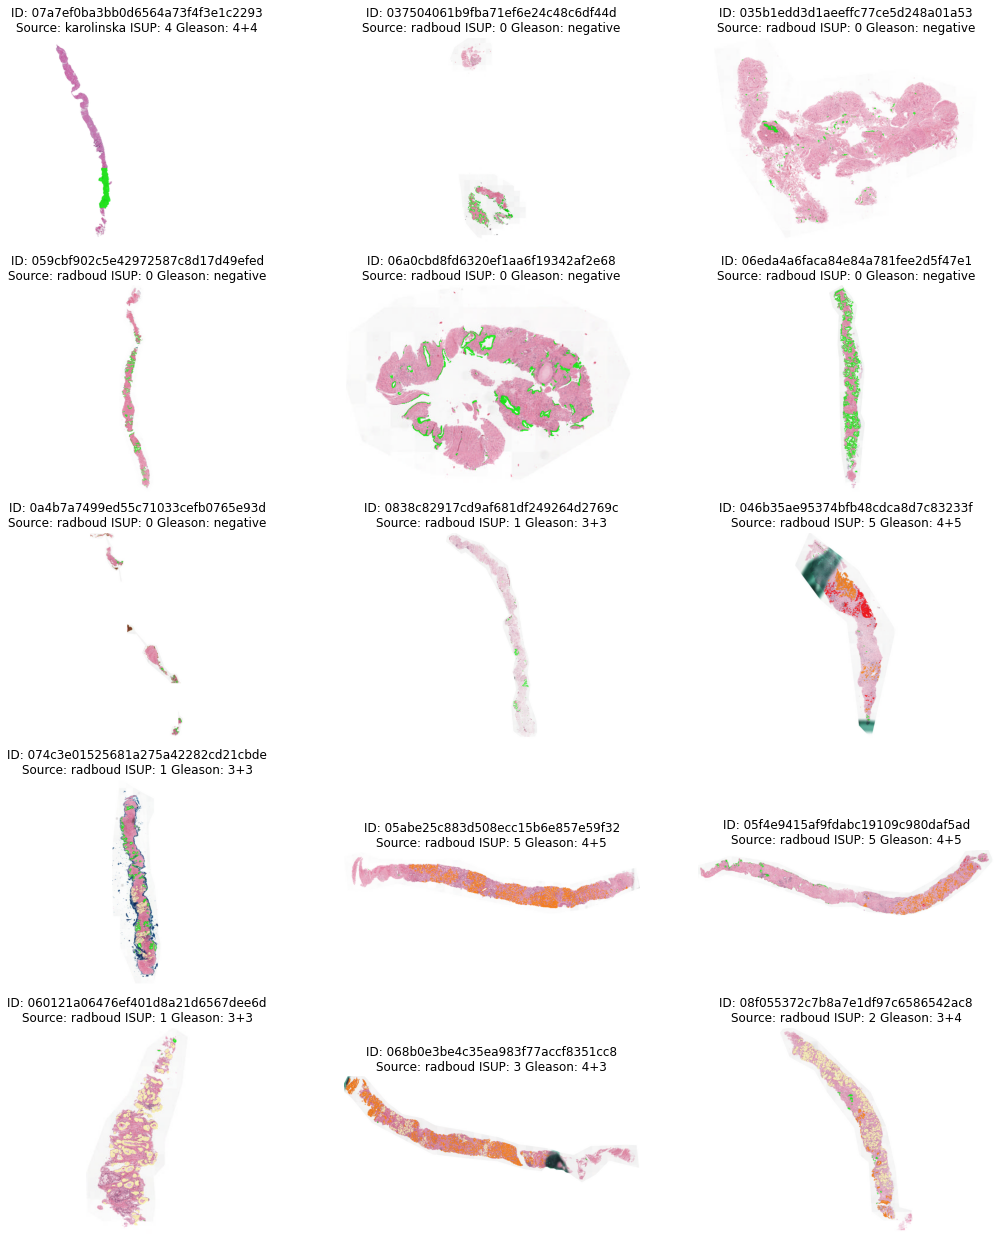

In [ ]:
overlay_mask_on_slide(images)

## Exploring images with pen markers

It is mentioned [here](https://www.kaggle.com/c/prostate-cancer-grade-assessment/data) that in training dataset, there are few images with pen markers on them. The organizers left us with a Note as described below.


> Note that slightly different procedures were in place for the images used in the test set than the training set. Some of the training set images have stray pen marks on them, but the test set slides are free of pen marks.

Let's take a look on few of these images.


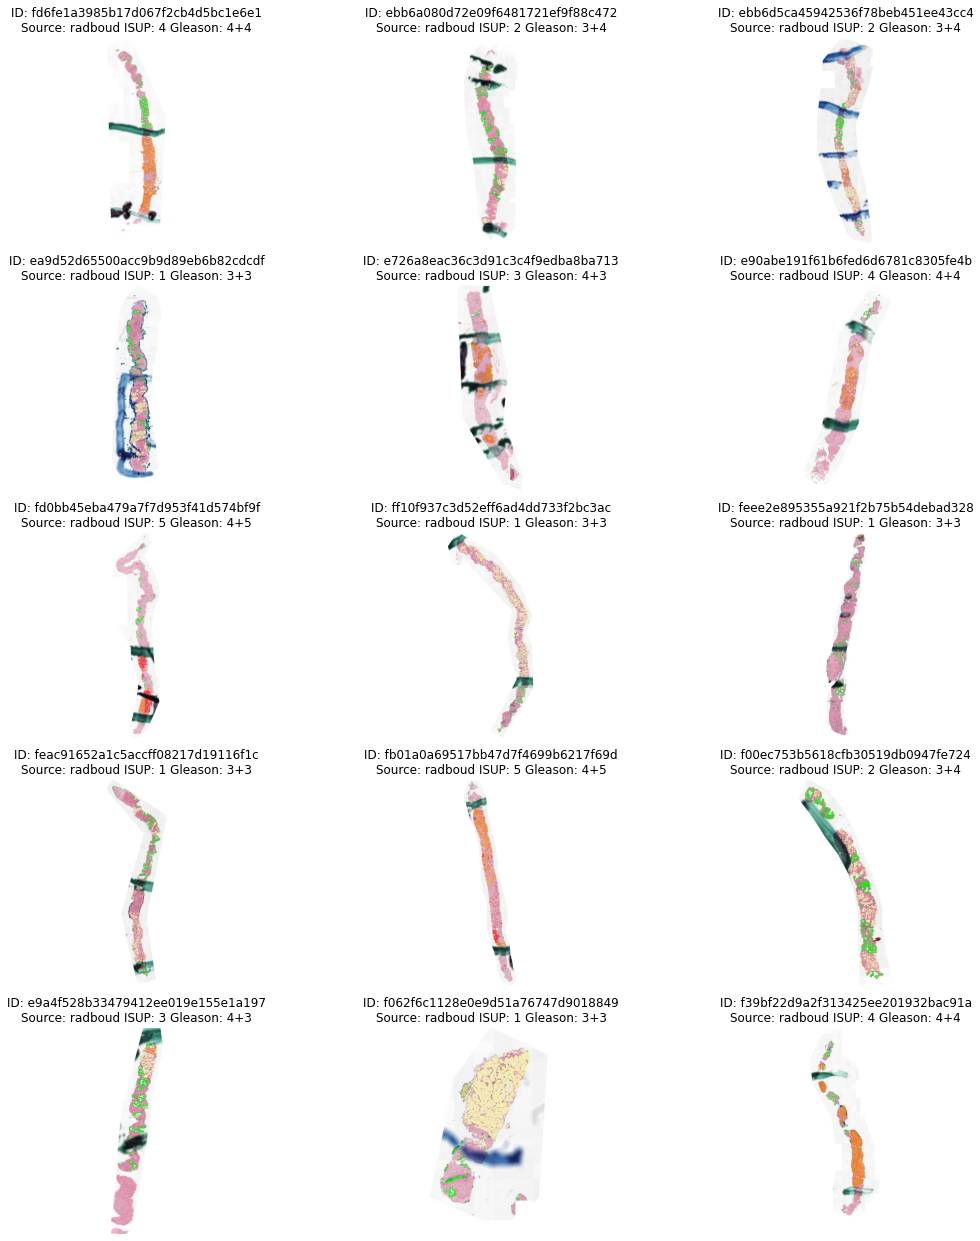

In [ ]:
pen_marked_images = [
    'fd6fe1a3985b17d067f2cb4d5bc1e6e1',
    'ebb6a080d72e09f6481721ef9f88c472',
    'ebb6d5ca45942536f78beb451ee43cc4',
    'ea9d52d65500acc9b9d89eb6b82cdcdf',
    'e726a8eac36c3d91c3c4f9edba8ba713',
    'e90abe191f61b6fed6d6781c8305fe4b',
    'fd0bb45eba479a7f7d953f41d574bf9f',
    'ff10f937c3d52eff6ad4dd733f2bc3ac',
    'feee2e895355a921f2b75b54debad328',
    'feac91652a1c5accff08217d19116f1c',
    'fb01a0a69517bb47d7f4699b6217f69d',
    'f00ec753b5618cfb30519db0947fe724',
    'e9a4f528b33479412ee019e155e1a197',
    'f062f6c1128e0e9d51a76747d9018849',
    'f39bf22d9a2f313425ee201932bac91a',
]

overlay_mask_on_slide(pen_marked_images)

## Simple Baseline

In [ ]:
## refer: https://www.kaggle.com/c/prostate-cancer-grade-assessment/discussion/145182

import random
random.seed(42)


results = np.random.randint(0,6,len(submission))
submission['isup_grade'] = results
submission.to_csv('submission.csv', index=False)

Refrence to my other works for this competition:
* https://www.kaggle.com/rohitsingh9990/panda-resnext-inference-ensemble-lb-0-66
* https://www.kaggle.com/rohitsingh9990/panda-resnext-inference
* https://www.kaggle.com/rohitsingh9990/panda-resize-and-save-image-mask-overlay/notebook?scriptVersionId=32614926
* https://www.kaggle.com/c/prostate-cancer-grade-assessment/discussion/145850

> Help taken from following kernel:
* https://www.kaggle.com/gpreda/panda-challenge-starting-eda
* https://www.kaggle.com/iamleonie/panda-eda-visualizations-suspicious-data
* Domain knowledge info taken from https://www.kaggle.com/tanulsingh077/prostate-cancer-in-depth-understanding-eda-model

more to come,will update soon :)


### <p><span style="color:red">Ending note: <br>Please upvote this kernel if you like it . It motivates me to produce more quality content :)</br></span></p>
